In [417]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
from scipy.stats import chi2_contingency, chi2
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale = 2, style = 'darkgrid', rc = {'figure.figsize':(7, 7)})
from tqdm.auto import tqdm
from scipy.stats import norm

# Retention 1-го дня. A/B тест

In [280]:
control_all = 11850
test_all = 11620
control_ins = 3795
test_ins = 3835
#задаю основные параметры распределений

In [284]:
control = [0]*(control_all - control_ins) + [1]*control_ins
test = [0]*(test_all - test_ins) + [1]*test_ins
group_a = ['control']*len(control)
group_b = ['test']*len(test)
data = control + test
group = group_a+group_b
#инициализирую распределение с единицами и нулями, где 0 - установка, 1 - возврат в приложение

In [296]:
df= pd.DataFrame({'group':group, 'data':data})
df.head()

,group,data
0,control,0
1,control,0
2,control,0
3,control,0
4,control,0


In [295]:
abdata = pd.crosstab(df.data, df.group)
abdata

group,control,test
data,,
0,8055,7785
1,3795,3835


In [294]:
stat, p, dof, expected = chi2_contingency(abdata)
if p <= 0.05:
    print('Отклоняем нулевую гипотезу, p-value = ', round(p, 3))
else:
    print('Принемаем нулевую гипотезу, p-value = ', round(p, 3))
#A/B тестирование Кси-квадрат тестом

Принемаем нулевую гипотезу, p-value =  0.113


# CR. A/B тест

In [297]:
control_all = 11850
test_all = 11620
control_ins = 10867
test_ins = 10559
#задаю основные параметры распределений

In [298]:
control = [0]*(control_all - control_ins) + [1]*control_ins
test = [0]*(test_all - test_ins) + [1]*test_ins
group_a = ['control']*len(control)
group_b = ['test']*len(test)
data = control + test
group = group_a+group_b
#инициализирую распределение с единицами и нулями, где 0 - установка, 1 - покупка стикерпака

In [299]:
df= pd.DataFrame({'group':group, 'data':data})
df.head()

,group,data
0,control,0
1,control,0
2,control,0
3,control,0
4,control,0


In [300]:
abdata = pd.crosstab(df.data, df.group)
abdata

group,control,test
data,,
0,983,1061
1,10867,10559


In [301]:
stat, p, dof, expected = chi2_contingency(abdata)
if p <= 0.05:
    print('Отклоняем нулевую гипотезу, p-value = ', round(p, 3))
else:
    print('Принемаем нулевую гипотезу, p-value = ', round(p, 3))
#A/B тестирование Кси-квадрат тестом

Отклоняем нулевую гипотезу, p-value =  0.025


# Среднее число открытых стикерпаков на пользователя. A/B тест

In [313]:
mean_control = 8.84
sigma_control = 9.87
size_control = 11850
mean_test = 9.34
sigma_test = 9.86
size_test = 11620
#задаю основные параметры распределений

In [346]:
control_group= sigma_control * np.random.randn(size_control) + mean_control
#инициализирую распределение с заданными параметрами среднего и стандартного отклонения

In [421]:
control_group.mean()

8.840898283833157

In [388]:
test_group= sigma_test * np.random.randn(size_test) + mean_test
#инициализирую распределение с заданными параметрами среднего и стандартного отклонения

In [422]:
test_group.mean()

9.343901650125572

In [395]:
ss.ttest_ind(control_group, test_group)
#Тест критерий Стьюдента

Ttest_indResult(statistic=-3.8976715519075724, pvalue=9.739182876704498e-05)

### Отклоняем нулевую гипотезу о равенстве средних

In [409]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

  0%|          | 0/1000 [00:00<?, ?it/s]

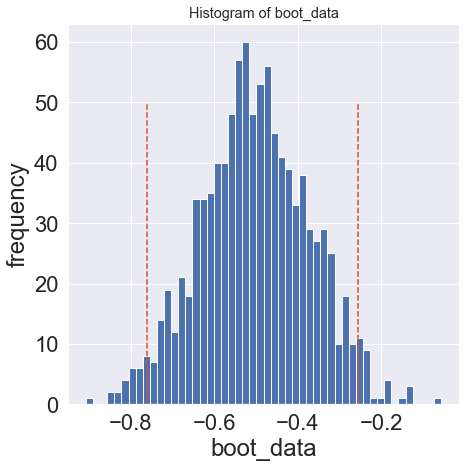

In [418]:
ctTrap = get_bootstrap(pd.Series(control_group), pd.Series(test_group))
#Бутстрэп тест

In [420]:
ctTrap['p_value']

0.0001071315818130219

### Бутстрэп тест также отвергает нулевую гипотезу о равенстве средних